# Module: braggdiskdetection

This module contains functions finding the positions of the Bragg disks in a 4DSTEM scan.  Generally this will involve two steps: getting a vacuum probe, then finding the Bragg disks using the vacuum probe as a template. 

## Submodule: deconvolution

The notebook demos functions for calculating the average deconvolution from a PointListArray of bragg peak positions.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import py4DSTEM

from py4DSTEM.process.braggdiskdetection import get_deconvolution

In [2]:
# Get data

fp = "/home/ben/Data/20180905_FePO4_unlithiated/processing/Stack1_processing_temp.h5"
browser = py4DSTEM.file.readwrite.FileBrowser(fp)
pointlistarray = browser.get_dataobject('braggpeaks')
browser.close()

Q_Nx,Q_Ny = 512,512

#### Deconvolution

In [3]:
# Get deconvolution

deconvolution = get_deconvolution(pointlistarray,Q_Nx,Q_Ny)

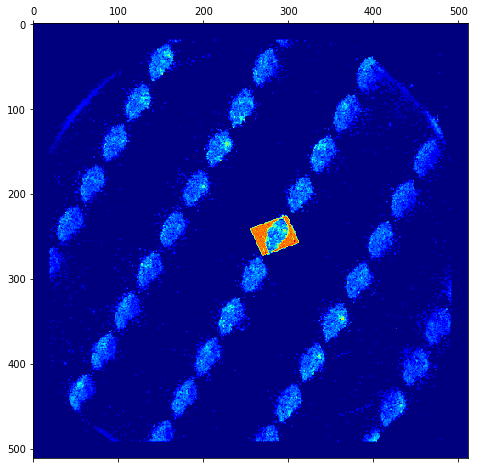

In [4]:
# Show

fig,ax = plt.subplots(figsize=(8,8))
ax.matshow(deconvolution**0.25,cmap='jet')
plt.show()

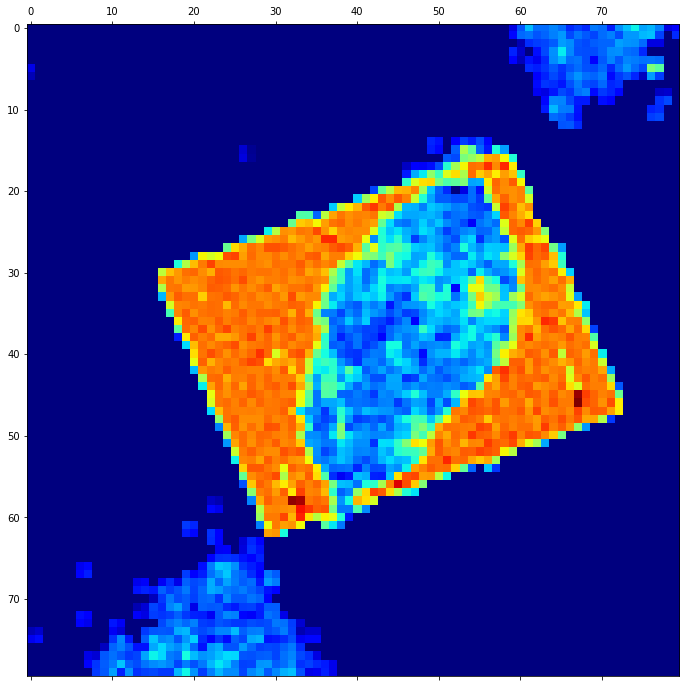

In [7]:
rad=40

from scipy.ndimage.filters import gaussian_filter
x0,y0 = np.unravel_index(np.argmax(gaussian_filter(deconvolution,20)),(Q_Nx,Q_Ny))

fig,ax=plt.subplots(figsize=(12,12))
ax.matshow(deconvolution[x0-rad:x0+rad,y0-rad:y0+rad]**0.25,cmap='jet')
plt.show()

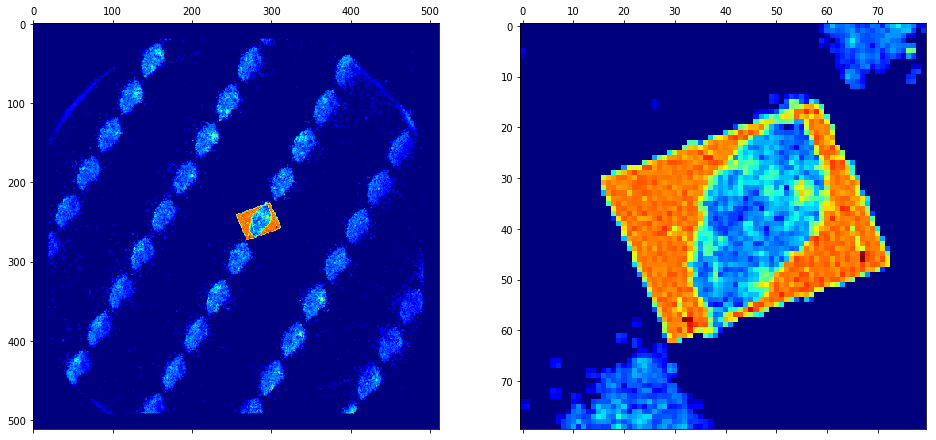

In [8]:
rad=40

from scipy.ndimage.filters import gaussian_filter
x0,y0 = np.unravel_index(np.argmax(gaussian_filter(deconvolution,20)),(Q_Nx,Q_Ny))

fig,(ax1,ax2)=plt.subplots(1,2,figsize=(16,8))
ax1.matshow(deconvolution**0.25,cmap='jet')
ax2.matshow(deconvolution[x0-rad:x0+rad,y0-rad:y0+rad]**0.25,cmap='jet')
plt.show()